In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [71]:
df=pd.read_csv('../datasets/LinearRegression/breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [72]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [73]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


<Axes: >

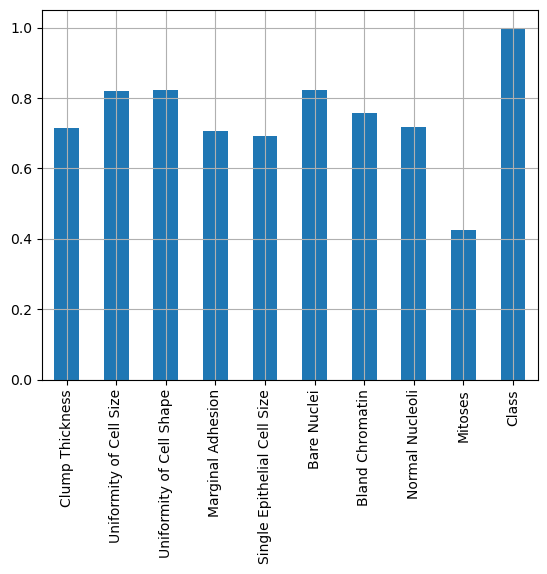

In [75]:
data=df.copy()
data.drop(['Class'],axis='columns')
data.corrwith(df['Class']).plot.bar(grid=True)

In [76]:
X=df.drop(['Class'],axis='columns')
y=df['Class']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

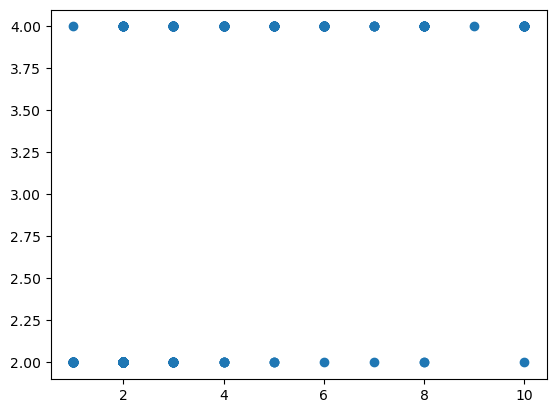

In [77]:
# len(X_train)
# len(y_train)
plt.scatter(X_train['Single Epithelial Cell Size'],y_train)

In [78]:

model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9708029197080292

610    4
376    2
461    2
57     4
505    2
      ..
358    2
599    2
125    2
615    2
413    2
Name: Class, Length: 137, dtype: int64

In [86]:

model.predict(X_test)

array([4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 2], dtype=int64)

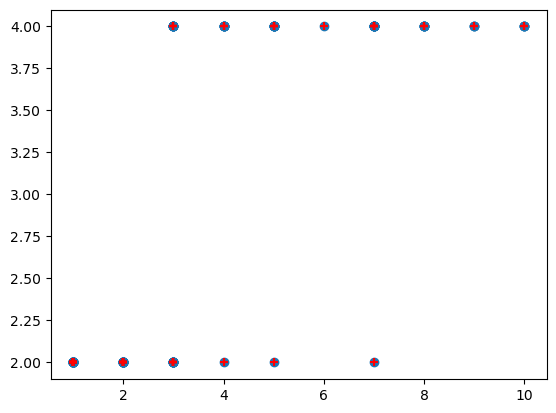

In [81]:
plt.scatter(X_test['Bland Chromatin'],y_test)
plt.scatter(X_test['Bland Chromatin'],model.predict(X_test),marker='+',c='r')